In [1]:
# Machine Learning for Trading - Udacity Lession 5 4


In [2]:

import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def symbol_to_path(symbol, base_dir="datafile"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "yahoo_{}_2017.csv".format(str(symbol)))

In [4]:
def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
  #  if 'SPY' not in symbols:  # add SPY for reference, if absent
   #     symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol        
        df_temp = pd.read_csv(symbol_to_path(symbol), dayfirst=True, index_col= "Date", parse_dates=True, usecols= ['Date','Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close':symbol})
        df = df.join(df_temp, how='inner')

    return df

In [7]:
def test_run():
    # Define a date range
    dates = pd.date_range('2017-01-01', '2017-12-31')

    # Choose stock symbols to read
    symbols = ['AAPL', 'GSPC', 'MSFT']
    
    # Get stock data
    df = get_data(symbols, dates)
    
        # Slice
    print(df.ix['2017-01-18':'2017-01-24',['MSFT', 'AAPL']])
    print(df.head(10))

    #plot_data(df)
    #plot_data(normalize_data(df))

    # Statistics
    print("Mean: \n", df.mean())
    print("Medium: \n", df.median())
    print("Std Dev: \n", df.std())

    #symbols = ['MSFT']
    #df = get_data(symbols, dates)

    ax= df['MSFT'].plot(title='MS rolling mean', label='MSFT')
    
    # Compute and plot rolling mean
    # rm_SPY = pd.rolling_mean(df['MSFT'], window=20)
    rm_MSFT = df['MSFT'].rolling(window=20).mean()
     
    rm_MSFT.plot(label='Rolling mean', ax=ax)
'''
    # 2. Compute rolling standard deviation
    rstd_MSFT = get_rolling_std(df['MSFT'], window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_MSFT, rstd_MSFT)
    
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df['MSFT'].plot(title="Bollinger Bands", label='MSFT')
    #rm_MSFT.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    ax.set_xlabel("Data")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()

        # Compute daily returns
    daily_returns = compute_daily_returns(df[['MSFT','AAPL']])
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    '''

'\n    # 2. Compute rolling standard deviation\n    rstd_MSFT = get_rolling_std(df[\'MSFT\'], window=20)\n\n    # 3. Compute upper and lower bands\n    upper_band, lower_band = get_bollinger_bands(rm_MSFT, rstd_MSFT)\n    \n    # Plot raw SPY values, rolling mean and Bollinger Bands\n    ax = df[\'MSFT\'].plot(title="Bollinger Bands", label=\'MSFT\')\n    #rm_MSFT.plot(label=\'Rolling mean\', ax=ax)\n    upper_band.plot(label=\'upper band\', ax=ax)\n    lower_band.plot(label=\'lower band\', ax=ax)\n\n    ax.set_xlabel("Data")\n    ax.set_ylabel("Price")\n    ax.legend(loc=\'upper left\')\n    plt.show()\n\n        # Compute daily returns\n    daily_returns = compute_daily_returns(df[[\'MSFT\',\'AAPL\']])\n    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")\n    '

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


                 MSFT        AAPL
2017-01-18  59.618385  115.403008
2017-01-19  59.427597  115.201050
2017-01-20  59.847321  115.412643
2017-01-23  60.057171  115.489578
2017-01-24  60.591358  115.383789
                  AAPL         GSPC       MSFT
2017-01-03  111.709831  2257.830078  59.694695
2017-01-04  111.584778  2270.750000  59.427597
2017-01-05  112.152229  2269.000000  59.427597
2017-01-06  113.402542  2276.979980  59.942703
2017-01-09  114.441246  2268.899902  59.751923
2017-01-10  114.556656  2268.899902  59.732849
2017-01-11  115.172195  2275.320068  60.276566
2017-01-12  114.691307  2270.439941  59.723312
2017-01-13  114.489334  2274.639893  59.809166
2017-01-17  115.412643  2267.889893  59.646996
Mean: 
 AAPL     146.107325
GSPC    2449.076379
MSFT      69.510333
dtype: float64
Medium: 
 AAPL     147.952927
GSPC    2436.100098
MSFT      68.672417
dtype: float64
Std Dev: 
 AAPL     14.827570
GSPC    109.417247
MSFT      7.198216
dtype: float64


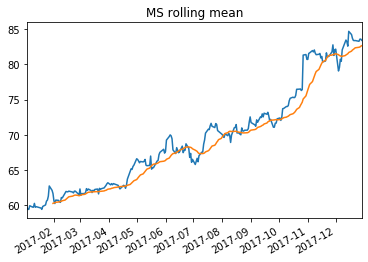

In [8]:
if __name__ == "__main__":
    test_run()